In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlt
import seaborn as sns
import psycopg2

In [21]:
# Importing the dataset
df = pd.read_csv("..\data\original_dataset.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [22]:
df_copy = df.copy()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [23]:
# Checking for NULL values
df_copy.isna().sum().sort_values(ascending = False)

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [24]:
df_copy.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Length: 30000, dtype: bool

In [25]:
# Checking for any outliers
df_copy.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [26]:
# Transpose for better readability
desc_df = df_copy.describe().T
print(desc_df[['min', '25%', '50%', '75%', 'max']])

                                 min       25%       50%        75%        max
ID                               1.0   7500.75   15000.5   22500.25    30000.0
LIMIT_BAL                    10000.0  50000.00  140000.0  240000.00  1000000.0
SEX                              1.0      1.00       2.0       2.00        2.0
EDUCATION                        0.0      1.00       2.0       2.00        6.0
MARRIAGE                         0.0      1.00       2.0       2.00        3.0
AGE                             21.0     28.00      34.0      41.00       79.0
PAY_0                           -2.0     -1.00       0.0       0.00        8.0
PAY_2                           -2.0     -1.00       0.0       0.00        8.0
PAY_3                           -2.0     -1.00       0.0       0.00        8.0
PAY_4                           -2.0     -1.00       0.0       0.00        8.0
PAY_5                           -2.0     -1.00       0.0       0.00        8.0
PAY_6                           -2.0     -1.00      

Observations:
- Age: min age is 21 and max age is 79
- Limit_Balance: min balance is 10K and max balance is 1M
- Bill_Amount1: min bill is -165K and max is 964K
- pay_amount1: min is 0 and max is 873K

Checking for Outliers
- max age is 79: so checking are they reasonable credit card users
- credit limit balance is 1M would be unrealistic
- bill_amt columns have extreme negative values
- pay_amt have extremely high payments could be fraudulent

In [27]:
# Using Interquartile Range (IQR) method to detect outliers

# Defining lower and upper bound
Q1 = df_copy['AGE'].quantile(0.25)
Q3 = df_copy['AGE'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Finding Outliers
outliers_age = df_copy[(df_copy['AGE'] < lower_bound) | (df_copy['AGE'] > upper_bound)]

print(f'Outliers in AGE column:\n {outliers_age}')

Outliers in AGE column:
           ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
102      103     480000    1          1         1   63      0      0      0   
246      247     250000    2          2         1   75      0     -1     -1   
366      367      50000    2          2         1   61      0      0      0   
387      388      80000    1          3         1   73     -1      0      0   
1029    1030      30000    2          2         1   67      2      2      0   
...      ...        ...  ...        ...       ...  ...    ...    ...    ...   
29163  29164     360000    2          3         1   73     -2     -2     -2   
29171  29172     510000    2          3         1   61      0      0      0   
29173  29174     360000    2          1         1   64     -2     -2     -2   
29175  29176     160000    2          3         1   74      0      0      0   
29179  29180     500000    2          2         1   73     -2     -2     -2   

       PAY_4  ...  BILL_AM

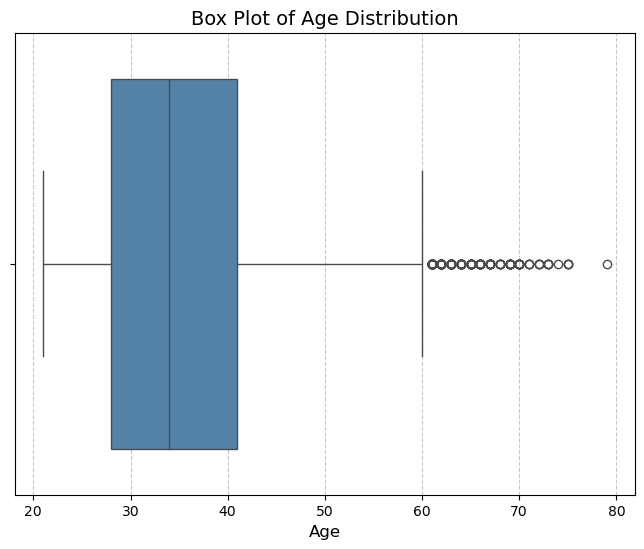

In [31]:
# plotting a box plot to check these outliers are extreme or not
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x=df_copy['AGE'], color='steelblue')

# Adding title and labels
plt.title('Box Plot of Age Distribution', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.xticks(fontsize=10)  # Adjust x-axis numbers size

# Adding grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

Observations:
